# Face Recognition
---

**Project description** <br>
Design a face recognition system using the eigenface method you have learned in
class. You will be given a set of M training images and another set of test images. Use the training
images to produce a set of eigenfaces. Then recognize the face in the input image using the eigenface
method. Use Euclidean distance as distance measure for computing $d_i$ , for i = 0 to M. You can
manually choose the thresholds $T_0$ and $T_1$ that produce the best results.

What to hand in:
+ An **MS Words file** that contains your **source code** (with full comments and documentation), the **language and  compiler** used, **instructions on how to compile and run** your program, and the following: 
    - The manually chosen thresholds $T_0$ and $T_1$ , the mean face m, and the M eigenfaces. The eigenfaces are contained in the matrix U, with each column represents an eigenface. You can output each eigenface as an N $\times$ N image.
    - The PCA coefficients ($Ω_i$) for each training image. 
    - For each test image: the image after subtracting the mean face I, its PCA coefficients ($Ω_i$), the reconstructed face image ($I_R$), distances $d_i$ for i = 0 to M, and classification result (non-face, unknown face, or identify of face.)

+ **Your executable code**, the original **output image** files as described in (a) above as individual files.

<hr>
**Dataset Description:**<br>
- It consists of a set of 17 grayscale face images (in JPG format). Each image is of dimension 195 x 231 (width x height) pixels and each pixel uses 8 bits for grayscale. 
- Use the following 8 images as training images: subject01.normal, subject02.normal, subject03.normal, subject07.normal, subject10.normal, subject11.normal, subject14.normal and subject15.normal. Use all 17 images (including the 8 training images) in the dataset as test images. 
- Non-face image: A non-face image (apple1) in JPG format is attached. This image is also of dimension 195 x 231. In addition to the 17 face images,  test your algorithm on this non-face image. 

Note: In the lecture slides, the training and test images are of size N X N (same horizontal and vertical dimensions.) The face images in the above dataset have different horizontal and vertical dimensions, but the Eigenface method works the same way and with no changes to the formulas. 

In [130]:
# https://github.com/vutsalsinghal/EigenFace/blob/master/Face%20Recognition.ipynb
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from sklearn.datasets import fetch_lfw_people #Dataset
import random

## Read Images

In [131]:
# ---------------------------- LOAD DATASET ---------------------------- #

# this command will download the LFW_people's dataset to hard disk.

lfw_people = fetch_lfw_people(data_home='D:\Senior II\Image Processing\Project\LFW Dataset',
# lfw_people = fetch_lfw_people(data_home='D:\Work\CCE\Year 4 - Senior 2\Semester 1\Senior-2-Semester-1\Image Processing\Project',
min_faces_per_person = 70, resize = 0.4)

In [132]:
images = lfw_people.images
print('Images shape:',images.shape)

total_images, height, width = images.shape
print(f'Each image has size: {height} x {width}')

print(70* '-')

m = int(total_images * 0.8)
print('M = Number of examples = ', m)

m_test = total_images - m
print('M_test = Number of test examples = ', m_test)

train_images = images[:int(m)]
print('Train images shape:', train_images.shape)

test_images = images[int(m):]
print('Test images shape:', test_images.shape)

n_features = height*width
print(f'N^2 = n_features = h x w = {n_features}')

print(70* '-')

y = lfw_people.target
print('y has shape:', y.shape)

y_train = y[:int(m)]
print('y_train has shape:', y_train.shape)

y_test = y[int(m):]
print('y_test has shape:', y_test.shape)

target_names = lfw_people.target_names
num_people = target_names.shape[0]
print('Number of people =', num_people)

Images shape: (1288, 50, 37)
Each image has size: 50 x 37
----------------------------------------------------------------------
M = Number of examples =  1030
M_test = Number of test examples =  258
Train images shape: (1030, 50, 37)
Test images shape: (258, 50, 37)
N^2 = n_features = h x w = 1850
----------------------------------------------------------------------
y has shape: (1288,)
y_train has shape: (1030,)
y_test has shape: (258,)
Number of people = 7


In [133]:
# dataset_path = 'Dataset/'
# dataset_dir  = os.listdir(dataset_path)

# width  = 195
# height = 231

In [134]:
# print('Train Images:')
# train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 
# 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 
# 'subject15.normal.jpg']
training_tensor = np.ndarray(shape=(m, height*width), dtype=np.float64)

for i in range(m):
    img = train_images[i]
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    # plt.subplot(2,4,1+i)
    # plt.imshow(img, cmap='gray')
    # plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()

# print('Test Images:')
# test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(m_test, height*width), dtype=np.float64)

for i in range(m_test):
    img = test_images[i]
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
#     plt.subplot(3,6,1+i)
#     plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
#     plt.imshow(img, cmap='gray')
#     plt.subplots_adjust(right=1.2, top=1.2)
#     plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()

print(f'Train images shape {training_tensor.shape}')
print(f'Test images shape {testing_tensor.shape}')


Train images shape (1030, 1850)
Test images shape (258, 1850)


## Mean face

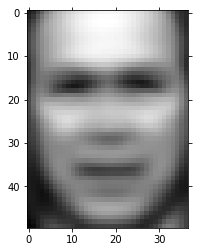

In [135]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(m)).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalised faces

In [136]:
normalised_training_tensor = np.ndarray(shape=(m, height*width))

for i in range(m):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

### Display normalised faces

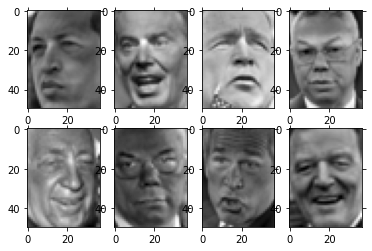

In [137]:
for i in range(8):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Covariance matrix

In [138]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.52097064e-03 -5.00132802e-05 -1.61242297e-04 ...  1.51442866e-04
   5.48431867e-05  1.33826778e-04]
 [-5.00132802e-05  2.24026323e-03 -1.43600611e-04 ...  6.41067321e-05
  -2.07853217e-04 -1.78730160e-04]
 [-1.61242297e-04 -1.43600611e-04  1.94943123e-03 ... -5.71644080e-05
  -1.00721214e-04 -3.22039867e-05]
 ...
 [ 1.51442866e-04  6.41067321e-05 -5.71644080e-05 ...  7.06971028e-04
   1.77822437e-04 -5.46775858e-05]
 [ 5.48431867e-05 -2.07853217e-04 -1.00721214e-04 ...  1.77822437e-04
   2.06816808e-03 -1.75990962e-05]
 [ 1.33826778e-04 -1.78730160e-04 -3.22039867e-05 ... -5.46775858e-05
  -1.75990962e-05  1.13381541e-03]]


In [139]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.00443493 -0.0126636   0.005325   ...  0.00620608  0.00519753
   0.00308387]
 [-0.02210997 -0.01064379  0.01163102 ...  0.03889309  0.0535333
  -0.01528604]
 [-0.01145078  0.01874477  0.0011148  ...  0.00906763 -0.00663315
   0.03057359]
 ...
 [-0.0016781  -0.01352874 -0.0043435  ... -0.02038666 -0.03169021
   0.01452381]
 [ 0.03304884 -0.04195347 -0.03009544 ... -0.03124085 -0.01166716
   0.02969566]
 [ 0.01689271  0.03106524  0.01397258 ... -0.03259686  0.01223918
   0.05113606]]

Eigenvalues of Cov(X): 
[4.10368034e-01 2.02629169e-01 1.64081601e-01 ... 4.93362314e-06
 5.22261787e-06 5.23609952e-06]


In [140]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

## Find cumulative variance of each principle component

Cumulative proportion of variance explained vector: 
[0.17932166 0.26786608 0.33956607 ... 0.99999943 1.         1.        ]


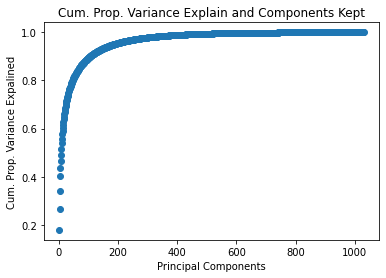

In [141]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Choose the necessary no.of principle components:

In [142]:
K = m
reduced_data = np.array(eigvectors_sort[:K]).transpose()

Now we try to find the projected data. This will form the eigen space.

In [143]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

## Finding weights for each traning image

In [144]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w.shape

(1030, 1030)

## Now we recognise unknown face!

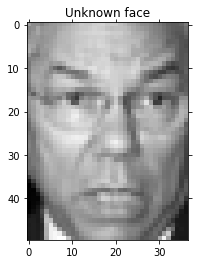

In [145]:
index = int(random.random() * test_images.shape[0])
unknown_face = test_images[index]
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalise unknown face

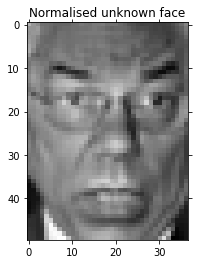

In [146]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Wieghts of uknown face

Projecting the normalized vector onto the eigenspace, to find out the weights:

In [147]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown.shape

(1030,)

Finding the $min|W - W_{unknown}|$

In [148]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms.shape)
min(norms)

(1030,)


9401.245456178525

## Reconizing all test images

In [151]:
# ---------------------------- TESTING ACCURACY ---------------------------- #

count = 0
trials = 1000
for trial in range(trials):
    # Get test image index randomly
    random_index = int(random.random() * m_test)
    
    # Get image
    test_image = testing_tensor[random_index, :]
    normalised_uface_vector = np.subtract(test_image, mean_face)
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    nearest_person_index = np.argmin(norms)
    nearest_person = y_train[nearest_person_index]
    if(nearest_person == y_test[random_index]):
        count += 1


print(f'Accuracy: {count/trials*100}%')

Accuracy: 33.300000000000004%


In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread('Dataset/'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))